In [14]:
import pandas as pd
from pathlib import Path
import re

In [60]:
nov_beamtime = Path("C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Nov/XRR/Processed/ZnPc")
dec_beamtime = Path("C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023Dec/XRR/Processed/ZnPc")

nov_files = list(nov_beamtime.glob("*_refl*.parquet"))
dec_files = list(dec_beamtime.glob("*_refl*.parquet"))

len(nov_files), len(dec_files)

(18, 13)

In [89]:
import numpy as np
combined = []
for f in nov_files:
    df = pd.read_parquet(f)
    df.dropna(subset=["Q", "Refl"], inplace=True)
    df["scan"] = re.search(r"\d{5}", f.name).group()
    df["Energy"] = df["Energy"].round(1)
    combined.append(df[["scan", "Q", "Refl", "Err", "Energy", "POL"]])

df_nov = pd.concat(combined)
df_nov.set_index(["scan", "Energy"], inplace=True)

combined = []
for f in dec_files:
    df = pd.read_parquet(f)
    df.dropna(subset=["Q", "Refl"], inplace=True)
    df["scan"] = re.search(r"\d{4,5}", f.name).group()
    df["Energy"] = df["Energy"].round(1)
    combined.append(df[["scan", "Q", "Refl", "Err", "Energy", "POL"]])

df_dec = pd.concat(combined)
df_dec.set_index(["scan", "Energy"], inplace=True)
display(df_nov)
display(df_dec)

Q      Refl           Err    POL
scan  Energy                                       
82219 283.7   0.0021  0.261401  4.611168e-02  100.0
      283.7   0.0042  0.126823  2.237986e-02  100.0
      283.7   0.0063  0.115192  2.033289e-02  100.0
      283.7   0.0084  0.225153  3.975511e-02  100.0
      283.7   0.0106  0.316028  5.576832e-02  100.0
...              ...       ...           ...    ...
82261 289.0   0.2701  0.000006  4.976217e-14  190.0
      289.0   0.2714  0.000006  5.026297e-14  190.0
      289.0   0.2727  0.000006  4.904606e-14  190.0
      289.0   0.2740  0.000006  4.611777e-14  190.0
      289.0   0.2752  0.000005  4.057319e-14  190.0

[2104 rows x 4 columns]

Q      Refl           Err    POL
scan  Energy                                       
82862 283.7   0.0022  0.764742  1.976195e-04  100.0
      283.7   0.0044  0.317005  8.185520e-05  100.0
      283.7   0.0065  0.091058  2.350316e-05  100.0
      283.7   0.0087  0.154868  3.996017e-05  100.0
      283.7   0.0109  0.195070  5.037352e-05  100.0
...              ...       ...           ...    ...
82872 284.2   0.2661  0.000002  1.397483e-14  190.0
      284.2   0.2673  0.000002  1.774014e-14  190.0
      284.2   0.2684  0.000002  1.740305e-14  190.0
      284.2   0.2696  0.000002  2.068975e-14  190.0
      284.2   0.2707  0.000002  2.189193e-14  190.0

[1601 rows x 4 columns]

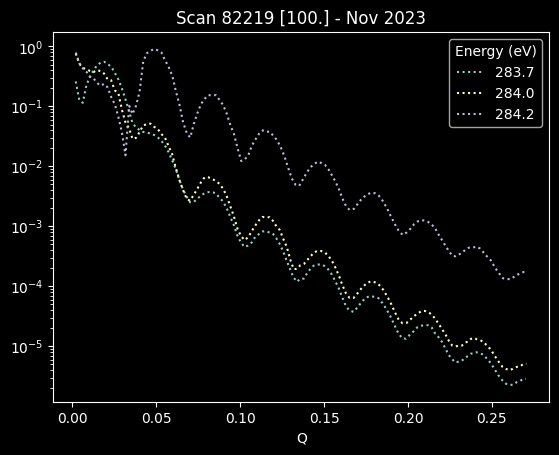

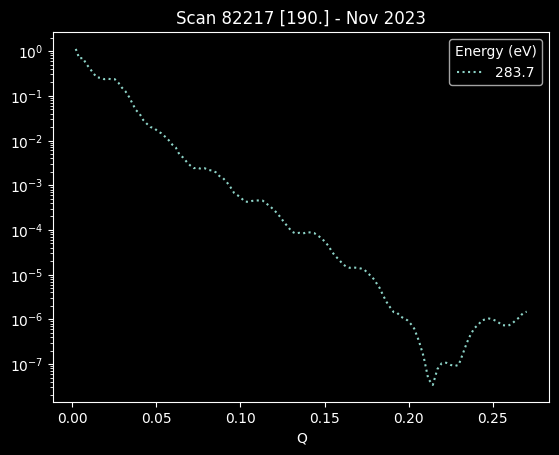

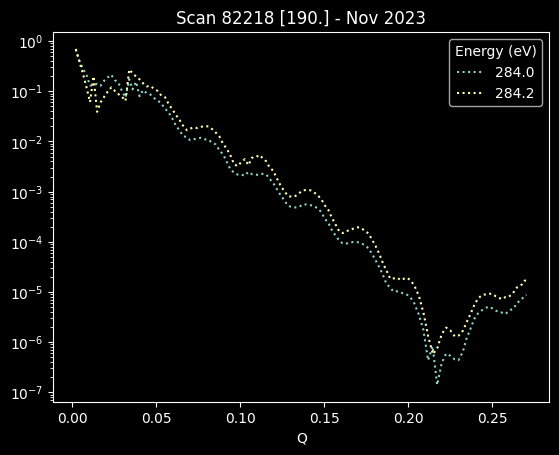

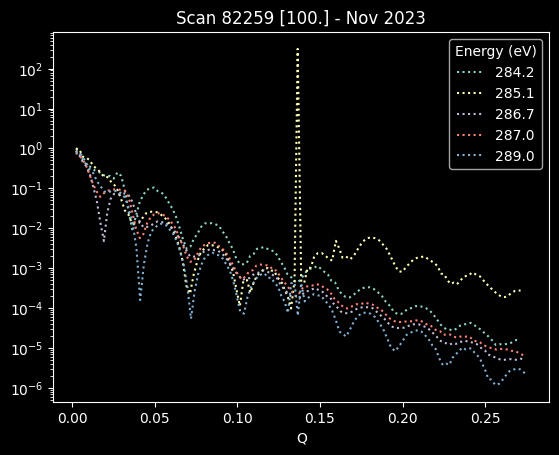

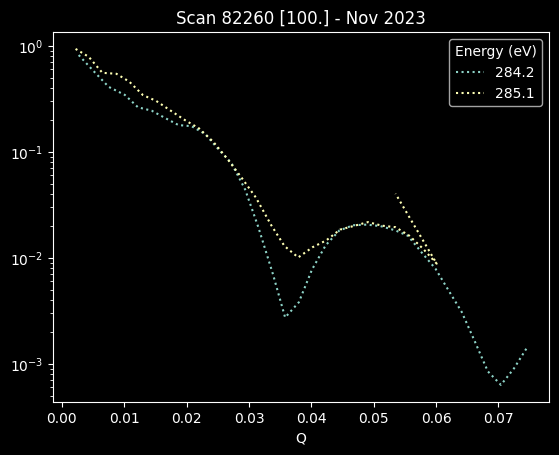

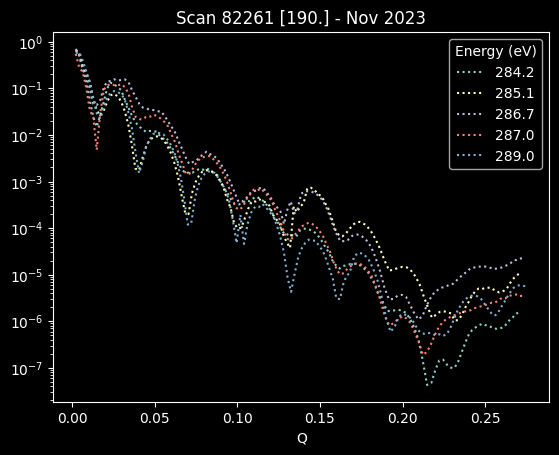

In [96]:
for s in df_nov.index.get_level_values(0).unique():
    import matplotlib.pyplot as plt
    df = df_nov.loc[s]
    pol = df["POL"].unique()
    fig, ax = plt.subplots()
    for e in df.index.get_level_values(0).unique():
        df.loc[e].plot(x="Q", y="Refl", ax=ax, label=e, logy=True, style=":")
        plt.legend(title="Energy (eV)")
    ax.set_title(f"Scan {s} {pol} - Nov 2023")

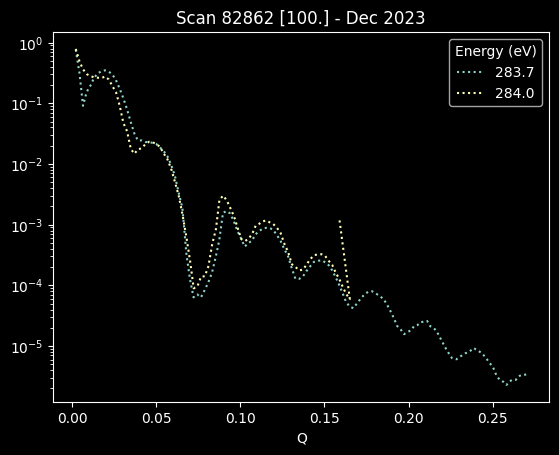

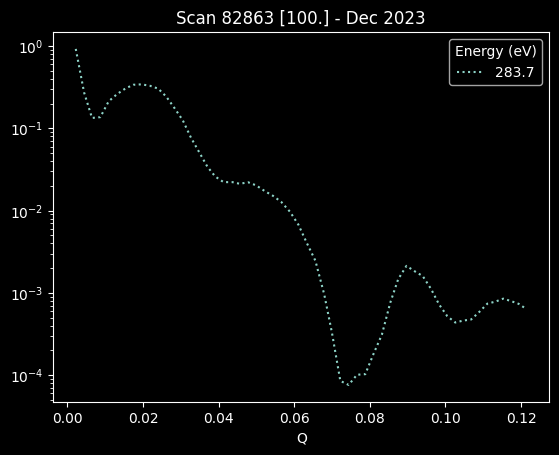

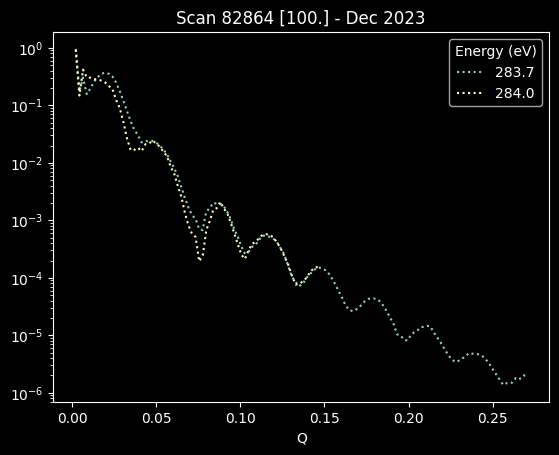

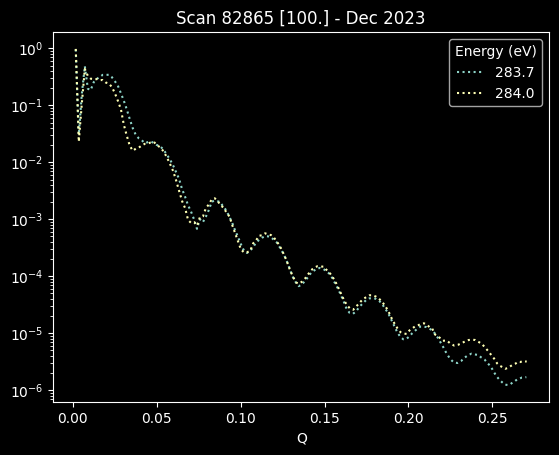

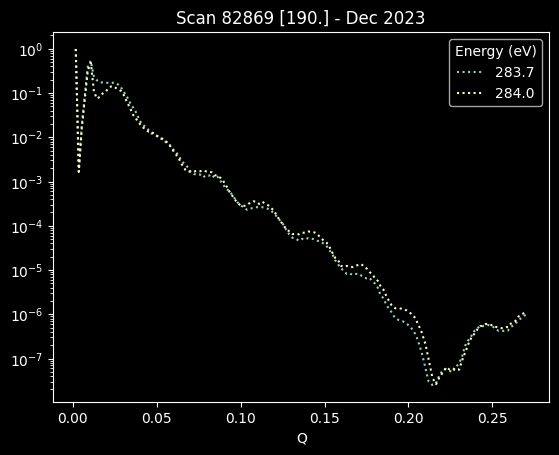

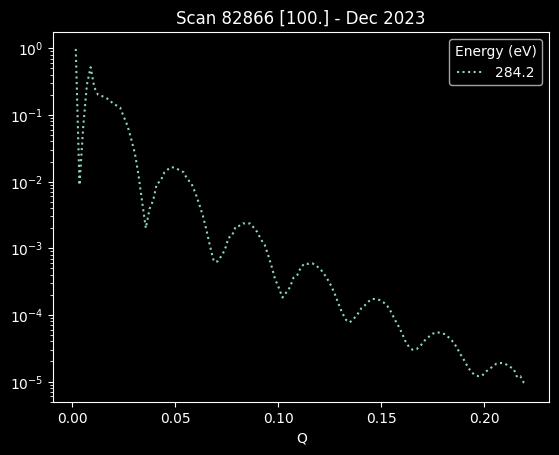

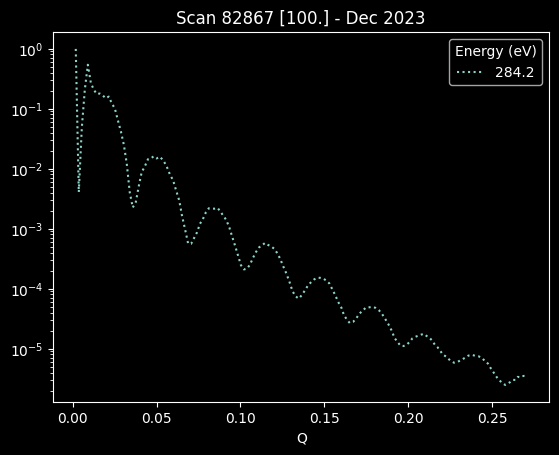

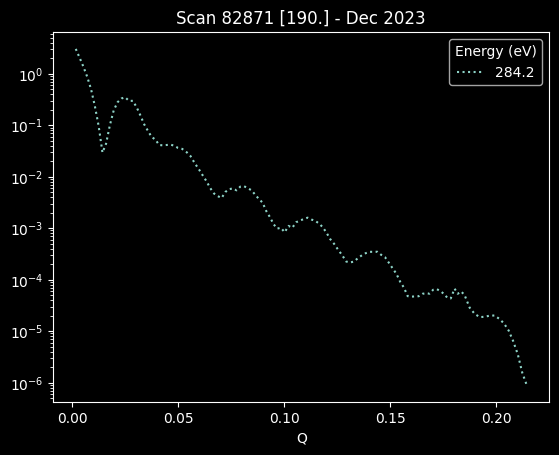

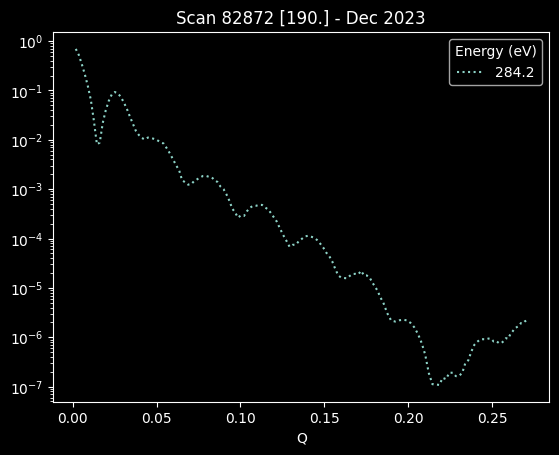

In [95]:
for s in df_dec.index.get_level_values(0).unique():
    import matplotlib.pyplot as plt
    df = df_dec.loc[s]
    pol = df["POL"].unique()
    fig, ax = plt.subplots()
    for e in df.index.get_level_values(0).unique():
        df.loc[e].plot(x="Q", y="Refl", ax=ax, label=e, logy=True, style=":")
        plt.legend(title="Energy (eV)")
    ax.set_title(f"Scan {s} {pol} - Dec 2023")